In [1]:
import os
import time
import gc
import json
import datetime
import warnings
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import seaborn as sns

os.chdir('../src')

from paths import *
import util.util_functions as util
import util.log_functions as log

%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_format = 'retina'

pd.options.display.precision = 15
warnings.filterwarnings('ignore')

In [2]:
test_data_dir = Path(DATA_DIR/'input'/'test')
seg_id = []
acoustic_data = []
for data_path in tqdm(list(test_data_dir.glob('*.csv'))):
    sub_test = pd.read_csv(data_path, dtype={'acoustic_data':np.float64})
    acoustic_data.extend(sub_test['acoustic_data'].tolist())
    seg_id.extend([data_path.name.split('.')[0]]*sub_test.shape[0])

In [ ]:
test = pd.DataFrame({'seg_id':seg_id, 'acoustic_data':acoustic_data})

(array([5.00000000e+00, 7.00000000e+00, 3.00000000e+00, 7.00000000e+00,
        7.00000000e+00, 1.00000000e+01, 1.00000000e+01, 1.50000000e+01,
        3.00000000e+01, 4.10000000e+01, 7.20000000e+01, 1.43000000e+02,
        2.78000000e+02, 4.10000000e+02, 7.06000000e+02, 1.24700000e+03,
        2.32000000e+03, 5.32000000e+03, 5.12480000e+04, 3.93511405e+08,
        1.78970000e+04, 4.10400000e+03, 2.00100000e+03, 1.12700000e+03,
        6.43000000e+02, 3.92000000e+02, 1.92000000e+02, 1.38000000e+02,
        1.04000000e+02, 5.30000000e+01, 2.60000000e+01, 1.80000000e+01,
        8.00000000e+00, 6.00000000e+00, 2.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.00000000e+00]),
 array([-6323. , -5996.4, -5669.8, -5343.2, -5016.6, -4690. , -4363.4,
        -4036.8, -3710.2, -3383.6, -3057. , -2730.4, -2403.8, -2077.2,
        -1750.6, -1424. , -1097.4,  -770.8,  -444.2,  -117.6,   209. ,
          535.6,   862.2,  1188.8,  1515.4,  1842. ,  2168.6,  24

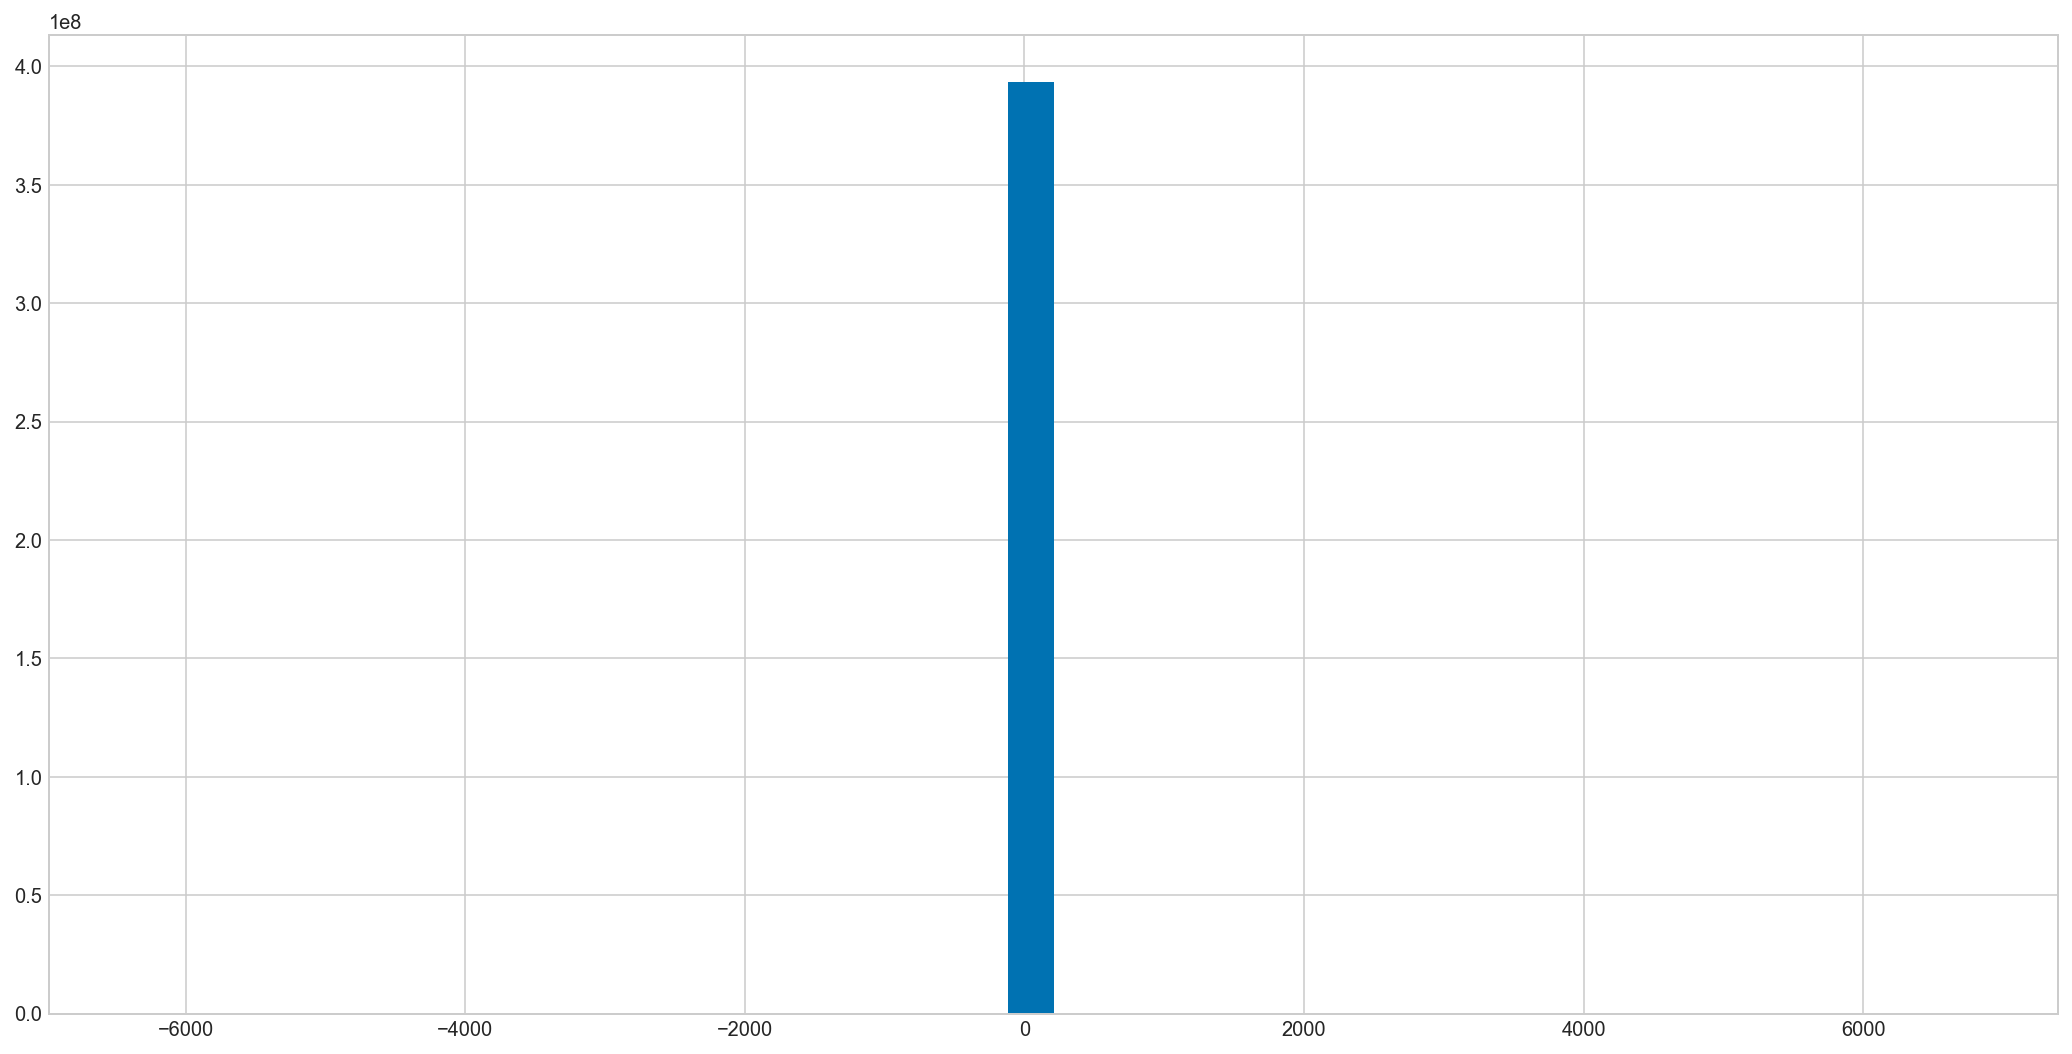

In [3]:
plt.figure(figsize=(18, 9))
plt.hist(acoustic_data, bins=40)